<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Exercise10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 10
In this exercise, you will plot the land cover of Arkansas in summer and fall 2004. You will need to 

(1) Download the AR land cover data from the link: http://gis.arkansas.gov/

(2) View data characters

(3) Plot maps for both land cover together

(4) Plot histogram for both land cover together

(5) Substract the map to investigate land cover changes during Summer and Fall in 2004 (optional).

In [ ]:
# This is the example code for your reference. You need to generate your own script.

# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
#!pip uninstall geopandas
import geopandas as gpd
!pip install rioxarray
import rioxarray as rxr
import xarray as xr
!pip install earthpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em
from shapely.geometry import mapping
from rasterio.crs import CRS
from rasterio.plot import plotting_extent
import rasterio as rio
from glob import glob

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# read the data
# as I built the script in Colab, I need to mount my google drive
# You do not need to do this step, as you use the Anaconda Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive/')

# !!!Change the path for your data
summer_path='/content/drive/My Drive/Colab Notebooks/LULC_SUMMER_CAST2004/LULC_SUMMER_CAST2004.tif'
fall_path='/content/drive/My Drive/Colab Notebooks/LULC_FALL_CAST2004/LULC_FALL_CAST2004.tif'
summer_lulc_arr = rxr.open_rasterio(summer_path, masked=True).squeeze()
fall_lulc_arr = rxr.open_rasterio(summer_path, masked=True).squeeze()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# check data structure
summer_lulc_arr

<xarray.DataArray (y: 13698, x: 15709)>
[215181882 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.043e+06 4.043e+06 ... 3.653e+06 3.653e+06
  * x            (x) float64 3.551e+05 3.551e+05 ... 8.027e+05 8.028e+05
    spatial_ref  int64 0
Attributes:
    RepresentationType:  THEMATIC
    STATISTICS_MAXIMUM:  210
    STATISTICS_MEAN:     99.930605570222
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   73.516876953625
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

In [ ]:
# check data structure
fall_lulc_arr

<xarray.DataArray (y: 13698, x: 15709)>
[215181882 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.043e+06 4.043e+06 ... 3.653e+06 3.653e+06
  * x            (x) float64 3.551e+05 3.551e+05 ... 8.027e+05 8.028e+05
    spatial_ref  int64 0
Attributes:
    RepresentationType:  THEMATIC
    STATISTICS_MAXIMUM:  210
    STATISTICS_MEAN:     99.930605570222
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   73.516876953625
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

In [ ]:
# check shape of land cover data
print(summer_lulc_arr.shape,fall_lulc_arr.shape)

(13698, 15709) (13698, 15709)


In [ ]:
# View the Coordinate Reference System (CRS), spatial extent, resolution, number of bands
print("The CRS for summer lclu is:", summer_lulc_arr.rio.crs, "The CRS for fall lclu is:", fall_lulc_arr.rio.crs)
print("The spatial extent for summer lclu is:", summer_lulc_arr.rio.bounds(),"The spatial extent for fall lclu is:", fall_lulc_arr.rio.bounds())
print("The spatial resolution for summer lclu is:", summer_lulc_arr.rio.resolution(), "The spatial resolution for fall lclu is:", fall_lulc_arr.rio.resolution())
print("The metadata for summer lclu is:", summer_lulc_arr.attrs, "The metadata for fall lclu is:", fall_lulc_arr.attrs)
print("Number of bands for summer lcluc is ", summer_lulc_arr.rio.count, "Number of bands for fall lcluc is ", fall_lulc_arr.rio.count)

The CRS for summer lclu is: EPSG:26915 The CRS for fall lclu is: EPSG:26915
The spatial extent for summer lclu is: (355081.5, 3652560.0, 802788.0, 4042953.0) The spatial extent for fall lclu is: (355081.5, 3652560.0, 802788.0, 4042953.0)
The spatial resolution for summer lclu is: (28.5, -28.5) The spatial resolution for fall lclu is: (28.5, -28.5)
The metadata for summer lclu is: {'RepresentationType': 'THEMATIC', 'STATISTICS_MAXIMUM': 210, 'STATISTICS_MEAN': 99.930605570222, 'STATISTICS_MINIMUM': 0, 'STATISTICS_STDDEV': 73.516876953625, 'scale_factor': 1.0, 'add_offset': 0.0, 'grid_mapping': 'spatial_ref'} The metadata for fall lclu is: {'RepresentationType': 'THEMATIC', 'STATISTICS_MAXIMUM': 210, 'STATISTICS_MEAN': 99.930605570222, 'STATISTICS_MINIMUM': 0, 'STATISTICS_STDDEV': 73.516876953625, 'scale_factor': 1.0, 'add_offset': 0.0, 'grid_mapping': 'spatial_ref'}
Number of bands for summer lcluc is  1 Number of bands for fall lcluc is  1


In [ ]:
# View no data value
print("The no data value for summer lclu is:", summer_lulc_arr.rio.nodata)

The no data value for summer lclu is: nan


In [ ]:
# View no data value
print("The no data value for fall lclu is:", fall_lulc_arr.rio.nodata)

The no data value for fall lclu is: nan


In [ ]:
# View minimum and maximum value
print("The minimum raster value is: ", np.nanmin(summer_lulc_arr.data))
print("The maximum raster value is: ", np.nanmax(summer_lulc_arr.data))

The minimum raster value is:  0.0
The maximum raster value is:  210.0


In [ ]:
# View minimum and maximum value
print("The minimum raster value is: ", np.nanmin(fall_lulc_arr.data))
print("The maximum raster value is: ", np.nanmax(fall_lulc_arr.data))

The minimum raster value is:  0.0
The maximum raster value is:  210.0


In [ ]:
# Prepare path to stack the data
lclu_path=[summer_path,fall_path]
lclu_path

['/content/drive/My Drive/Colab Notebooks/LULC_SUMMER_CAST2004/LULC_SUMMER_CAST2004.tif',
 '/content/drive/My Drive/Colab Notebooks/LULC_FALL_CAST2004/LULC_FALL_CAST2004.tif']

In [ ]:
# Stacked lclu data
lclu_data, land_meta = es.stack(lclu_path)
lclu_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

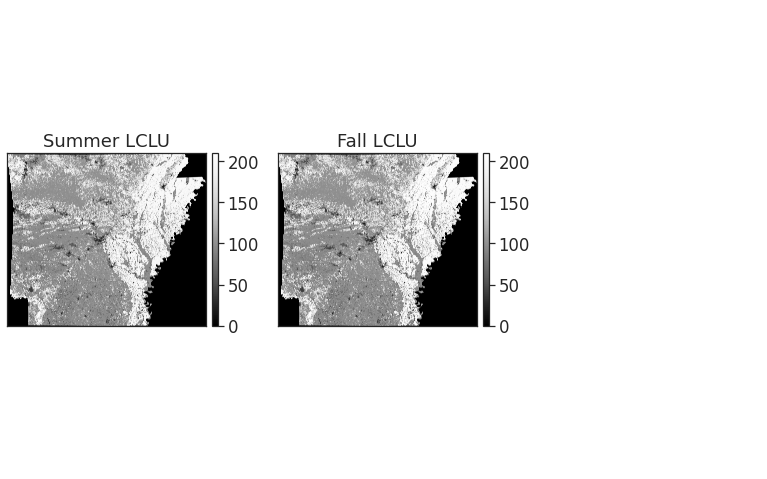

In [ ]:
# Plot all lclu
band_titles = ["Summer LCLU", "Fall LCLU"]

ep.plot_bands(lclu_data,
              figsize=(11, 7),
              title=band_titles,
              cbar=True)
plt.show()

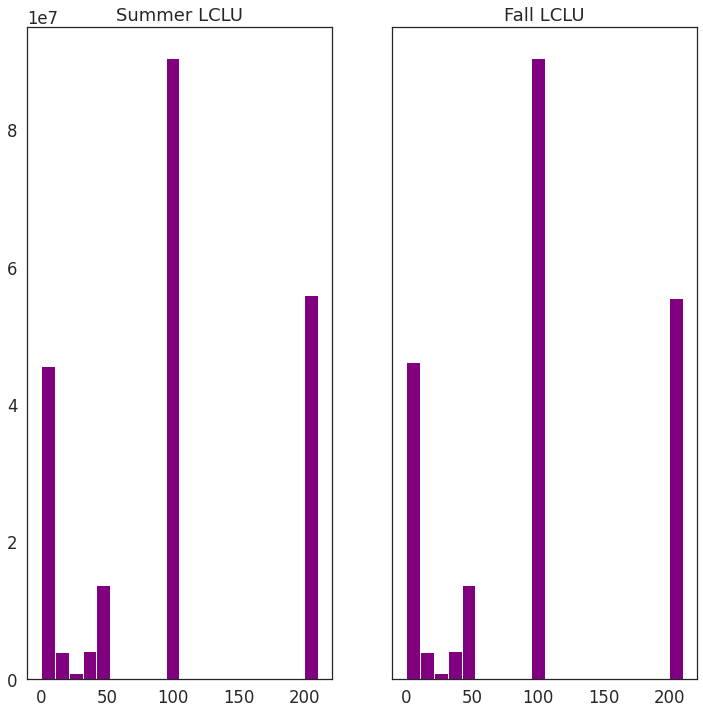

In [ ]:
# Plot all histograms using earthpy
band_titles = ["Summer LCLU", "Fall LCLU"]

ep.hist(lclu_data,
        title=band_titles)

plt.show()

In [ ]:
# Investigate land cover and land use change in 2004. Note if the value is 0, meaning there is no change in this pixel. Otherwise, there is change.
#lcluc_data = fall_lulc_arr - summer_lulc_arr
# Plot the data
#f, ax = plt.subplots(figsize=(10, 5))
#lcluc_data.plot(cmap="Greens")
#ax.set(title="Land Cover and Land Use Change in 2004")
#ax.set_axis_off()
#plt.show()